# **Music Recommendation System: Report**

## Executive summary

The development of an effective recommender system is crucial for enhancing user experience and maintaining a competitive edge in the music industry. Leveraging the rich dataset from Echo Nest, this project explores various recommendation algorithms to identify the most suitable model for the platform.

After rigorous testing and evaluation, the **Singular Value Decomposition (SVD)** algorithm emegerged as the superior model. Key performance metrics underscore its effectiveness:
- Root Mean Squared Error (RMSE): 1.024
- Precision: 41.4%
- Recall: 73.4%
- F1 score: 52.9%

These metrics indicate that SVD not only minimizes prediction error but also offers a balanced appraoch to recommending songs to users. The reliability of its predictions is further validated by favorable confusion matrix results (added in the revised notebook below).

Implementing the SVD-based recommender system is projected to enhance user engagement significantly. While this advancement promises increased user satisfaction and potential revenue growth, it also necessitates considerations regarding computational resources and infrastructure investmens for the company.

## Problem and solution summary

### Context and importance

Recommendation systems play a pivotal role in shaping user interactions on digital platforms. By guiding consumers based on their past behaviors, these systems aim to maximize satisfaction and engagement. For Echo Nest, a music platform under Spotify, optimizing the recommendation engine is critical. This optimization is essential not only for improving user retention and engagement but also for gaining a competitive advantage over other platforms like Soundcloud or Deezer, ultimately driving revenue growth.

### Objective:

The primary goal is to develop a recommender system that effectively suggest songs to users, enhancing their listening experience and encouraging prolonged platform engagement.

### Key questions addressed

This project addressed several key questions. First, which algorithm would best serve the platform's needs? To answer this, user-based and item-based collaborative filtering, SVD, and Co-Clustering were explored. Second, how reliable are the predictions made by these algorithms? This was assessed using metrics like RMSE, Precision, Recall, F1 Score, and confusion matrices to ensure that the recommendations could be trusted

### Solution overview

After evaluating various algorithms, Singular Value Decomposition (SVD) was identified as the optimal solution due to its superior performance accross key metrics. The SVD model's ability to capture latent relationships between users and songs makes it adept at generating personalized and accurate song recommendations.

## Recommendations for implementation

### Implementation steps

The implementation of the SVD model should follow a clear set of steps. First, data collection and cleaning must be prioritized. Data engineers will need to gather comprehensive user-song interaction data and ensure its quality, for instance by merging song IDs that correspond to the same song. Next, data processing and model development will be handled by data scientists, who will use tools like Pandas to manipulate the data and apply necessary cutoffs to manage the dataset size. The Surprise library’s SVD function will be employed in this step.

Once the data is prepared, hyperparameter tuning is critical. This process, also managed by data scientists, involves conducting cross-validation to fine-tune the SVD model for optimal performance. Finally, the model deployment phase will involve both data engineers and data scientists, who will integrate the trained model into the platform’s infrastructure, ensuring it is scalable and efficient.

### Resource requirements

Implementing the SVD model will require investment in high-performance GPUs to handle its computational demands. Software tools like Pandas and Surprise will also be essential for data processing and model development.

### Cost-benefit analysis

The estimated cost of implementing this solution, including computational resources, software, and labor over several months, is counted in $M. However, the potential benefits are substantial. The expected increase in user engagement could lead to significant revenue growth. For leading streaming companies, such an engagement boost has historically translated to revenue increases potentially in the millions/billions annually (example of Netflix).

### Potential risks and mitigation

Over-personalization is a significant risk in developing a recommendation system. By only suggesting music that aligns with a user's existing playlist, there is a danger of creating "echo chambers" where users are exposed to a narrow range of content. To mitigate this, it is essential to incorporate mechanisms that introduce a balance of familiar and novel song recommendations. This could be achieved by measuring user eclecticism -- essentially, how varied their tastes are -- and adjusting recommendations accordingly.

Another challenge lies in the computational demands of the SVD algorithm, particularly with large datasets. To address this, a hybrid approach could be employed, where Co-Clustering is used to segment the data initially. Following this, the SVD algorithm can be applied within these clusters, optimizing computational efficiency without sacrificing recommendation quality.

Finally, there is the issue of temporal dynamics. The current algorithm may fail to capture the importance of the order in which users discover and listen to music. To ensure a higher level of user satisfaction, future iterations of the recommendation system should consider integrating timestamp data. This would allow the algorithm to better understand and predict user preferences based on the sequence and timing of their interactions with the platform.

### Future enhancements

Looking ahead, the development of a hybrid model that combines content-based features with SVD holds great promise for further improving the recommendation system. A good starting point would be to integrate the 'year' feature, particularly given its observed impact on play_count. This could lead to more contextually relevant recommendations that take into account not just user behavior but also characteristics of the songs themselves.

Additionally, there is potential in exploring the integration of advanced features, such as embedding textual data from songs, thereby incorporating item-specific features to enrich the model. Lastly, the inclusion of temporal analysis, considering e.g. interaction timestamps, could significantly enhance the system's ability to adapt to changing user preferences and improve long-term engagement.

# **Music Recommendation System: notebook**

## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

**song_data**

- song_id - A unique id given to every song
- title - Title of the song
- Release - Name of the released album
- Artist_name - Name of the artist
- year - Year of release

**count_data**

- user _id - A unique id given to the user
- song_id - A unique id given to the song
- play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [135]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [136]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd
import random # to pick items or users randomly (sometimes useful)

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import the required library to compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# Import defaultdict from collections A dictionary output that does not raise a key error
from collections import defaultdict

# Import mean_squared_error : a performance metrics in sklearn
from sklearn.metrics import mean_squared_error

### **Load the dataset**

In [137]:
# Importing the datasets and immediately remove duplicates
song_df=pd.read_csv('/content/drive/MyDrive/MIT/projects/song_data.csv')
d1=song_df.duplicated().sum()
song_df.drop_duplicates(inplace=True)
print('The dataframe song_df has been loaded. \
A number of {} duplicates of the value song_id has been succesfully removed'.format(d1))

print('\n' + '-'*35 + '\n')

count_df=pd.read_csv('/content/drive/MyDrive/MIT/projects/count_data.csv')
d2=count_df.duplicated().sum()
count_df.drop_duplicates(inplace=True)
print('The dataframe count_df has been loaded. \
A number of {} duplicates of the value song_id has been succesfully removed'.format(d2))

The dataframe song_df has been loaded. A number of 498 duplicates of the value song_id has been succesfully removed

-----------------------------------

The dataframe count_df has been loaded. A number of 0 duplicates of the value song_id has been succesfully removed


### **Understanding the data by viewing a few observations**

In [138]:
# Display first 10 records of count_df data
print('There are ' + str(count_df.shape[0]) + ' rows and ' + str(count_df.shape[1]) + ' columns in count_df')
print('\n')
print('A total of {} unique users is involved in the data'.format(count_df.user_id.nunique()))
print('\n')
count_df.head(10)

There are 2000000 rows and 4 columns in count_df


A total of 76353 unique users is involved in the data




,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [139]:
# Evaluate shape of song_df
print('There are ' + str(song_df.shape[0]) + ' rows and ' + str(song_df.shape[1]) + ' columns in song_df')
print('\n')
print('Droping duplicated values for the pairs (title,artist_name), this essentiall yields a total of ' + str(song_df[['title','artist_name']].drop_duplicates().shape[0]) + ' different songs')
print('\n')

# display the first 10 entries
song_df.head(10)

There are 999502 rows and 5 columns in song_df


Droping duplicated values for the pairs (title,artist_name), this essentiall yields a total of 926096 different songs




,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


The value year=0 seems to appear a lot. To get a more precise picture (and see if there are other inconsistent values), we can check distinct values in the year column thanks to the following code snippet.

In [140]:
# COMPLEMENT ANALYSIS: check distinct values in year column

print(song_df.year.value_counts().head(), '\n\n',song_df.year.value_counts().tail())

year
0       484370
2007     39368
2006     37510
2005     34909
2008     34714
Name: count, dtype: int64 

 year
1925    7
1922    6
1933    6
1924    5
2011    1
Name: count, dtype: int64


**Observation :** There are 484424 entries (approximately a half of the songs) whose year attribute is 0. To avoid misinterpretation, it is preferable to convert this information as 'NaN', as follows.

In [141]:
# Replace each occurrence of year=0 by year=NaN
## (This action modifies the type of 'year' as float, so we convert back to Int64 for readability)
### We keep all other columns intact

song_df.replace({'year':{0:np.nan}},inplace=True)
song_df.year=song_df.year.astype('Int64')

### **Let us check the data types and and missing values of each column**

In [142]:
# Display info of count_df
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


Observation: the column Unnamed seems useless.

In [143]:
# Count different values of song_id within count_df

count_df.song_id.value_counts()

,count
song_id,
SOFRQTD12A81C233C0,8277
SOAUWYT12A81C206F1,7032
SOAXGDH12A8C13F8A1,6949
SOBONKR12A58A7A7E0,6412
SOSXLTC12AF72A7F54,6145
...,...
SOLIGVL12AB017DBAE,51
SOWNLZF12A58A79811,51
SOBPGWB12A6D4F7EF3,50


**Observation**: only 10000 (i.e. 1% of all songs) songs were actually listened to by users. Since our algorithms are based on interaction data (except maybe for the content based model), it is useless for now to keep all the data in song_df.

For future investigation, it would be sufficient to restrict our attention to those entries in song_df that have interaction data. This will reduce our computation time, and might save us time if we want to clean the data.

But for now, we leave things as they are.


In [144]:
# Display info of song_df
song_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999502 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   song_id      999502 non-null  object
 1   title        999485 non-null  object
 2   release      999495 non-null  object
 3   artist_name  999502 non-null  object
 4   year         515132 non-null  Int64 
dtypes: Int64(1), object(4)
memory usage: 46.7+ MB


**Observation:**

- There are a few (<20) missing values in other columns too: title and release.

- Although we could probably make an educated guess about what these songs are, probably the best option for now is to leave things as they are.  Moreover, the song_id's which is the most important data, is not missing in these rows.

#### **COMPLEMENT**: duplicates


Certainly, we want to avoid identical rows in our dataframe. We already addressed the problem of identical rows when we loaded the datasets (using the drop_duplicates function).

The song_id dataset however, still has some redundancies, potentially altering the quality of our data (and thus of our algorithms).

Indeed, even though we removed the duplicated rows, it is possible for instance that two rows correspond to the same pair (title, artist_name), but the year or release data is present in the first and absent in the second one, or vice versa. In this case, the situation is blurry and we cannot remove those duplicated values so easily.

We can create a function to display all (i.e. not only the first or last) duplicated entries, given a subset of columns.
Even though it is not crucial in our current analysis, this will allow us to understand better the issue if we want to do further improvements in the future.

In [145]:
# COMPLEMENT: create a function that displays all duplicates

def show_duplicates(df,subset):
  """
  Identify all duplicated entries and put them in a dataframe.

  Args:
  - df: Pandas dataframe
  - subset: subset of columns to check for duplicates

  Returns:
  - dataframe with all duplicated entries displayed
  """

  duplicated_entries = pd.concat(g for _, g in df.groupby(subset) if len(g) > 1)

  print('There are ' + str(duplicated_entries.shape[0]) + ' duplicated values in the dataframe \
  for the columns {}, \
  corresponding to {} different values \n'.format(subset,df.duplicated(subset=subset).sum()))

  return duplicated_entries

We can test our function on the column 'song_id':

In [146]:
# call show_duplicates on the sole column 'song_id'
show_duplicates(song_df, 'song_id')

There are 882 duplicated values in the dataframe   for the columns song_id,   corresponding to 446 different values 



,song_id,title,release,artist_name,year
304966,SOAAEFC12AB01852F1,De Tongbreker (Tineke Schouten & Linda de Mol),16 Liedjes Uit De Tineke Schouten Shows,Tineke Schouten,<NA>
963681,SOAAEFC12AB01852F1,De Tongbreker,Alle 40 Goed - Hollandse Duetten,Tineke Schouten/Linda De Mol/Franklin Brown,<NA>
347698,SOAGUAI12A8C143EAE,A Cruz,Via Brasil vol.1 (Cristal),Tania Maria,<NA>
688094,SOAGUAI12A8C143EAE,A Cruz,Tania Maria vol1,Tania Maria,<NA>
143863,SOAHLGV12AF72A6DFC,Adam's Song,Enema Of The State,Blink-182,1999
...,...,...,...,...,...
615491,SOZUPDR12A8C137FB6,42,Viva La Vida - Prospekt's March Edition,Coldplay,2008
126015,SOZWLJH12AF72A15CD,Lover Man,Live at Woodstock,Jimi Hendrix,1971
526778,SOZWLJH12AF72A15CD,Lover Man,Live At Woodstock,Jimi Hendrix,1971
689237,SOZYUXF12A6701F7B9,Addicted,Greatest Hits,Enrique Iglesias,2003


In principle, rows with identical song_id, such as the ones displayed above, should be merged. It is desirable because we are going to merge the two dataframes based on this particular column.

This is done as follows.

In [147]:
# check duplicates on 'song_id' and drop them

show_duplicates(song_df, 'song_id') # call function previously defined
N=song_df.duplicated(subset='song_id').sum() # number of distinct duplicated values

# drop the duplicates
song_df.drop_duplicates(subset='song_id',inplace=True)
print('A number of {} duplicates of the value song_id have been succesfully removed'.format(N))

There are 882 duplicated values in the dataframe   for the columns song_id,   corresponding to 446 different values 

A number of 446 duplicates of the value song_id have been succesfully removed


Some information is still redundant. We can verify this as follows:

In [148]:
# show duplicated values on ['title','artist_name']
show_duplicates(song_df, ['title','artist_name'])

There are 123486 duplicated values in the dataframe   for the columns ['title', 'artist_name'],   corresponding to 73072 different values 



,song_id,title,release,artist_name,year
516534,SOLFUZZ12AB0180D4F,Further Complications.,Further Complications/Girls Like It Too,Jarvis Cocker,<NA>
670018,SOLYGGA12AAF3B3D45,Further Complications.,Further Complications,Jarvis Cocker,<NA>
310807,SOTTXBK12A81C22CE0,# 2/10,Forbidden Techno Vol. 1,Forbidden,<NA>
334016,SOPUUCD12A81C22CD9,# 2/10,Forbidden Techno Vol. 1,Forbidden,<NA>
773088,SOKIQRM12A81C22CF8,# 3/10,Forbidden Techno Vol. 1,Forbidden,<NA>
...,...,...,...,...,...
953299,SOHHOTG12AC3DF617D,Über's Wasser Gehen,Soulstrip,Obscenity Trial,2009
148548,SOBVIAG12AC960DAA8,Übers Meer,Zwischen Null und Zero,Rio Reiser,<NA>
626194,SOMSSPZ12A58A7A38E,Übers Meer,Balladen,Rio Reiser,1996
599315,SOUJZOE12A8C13E453,Üc,Hikayeler Anlatildi 2. Baski,Gripin,<NA>


#### **Observations and Insights:**

- Although they pertain to the same song ids, these two datasets have different sizes (2M rows for the count dataset, ~1M for the song dataset). This is because each value of the variable song_id may be omitted or associated with different users in the first table (therefore repeating), while in principle the second dataframe contains each song exactly once (assuming no duplicates). In fact, an application of 'value_counts()' to the count dataframe showed that it contains 10000 different songs (this corresponds to 1% of all songs).

- The song dataframe has a few Null values within columns 'title', 'release', so we should maybe do a bit of data cleaning. Our complement analysis also reveals that column 'year' has 484424 occurrences of the inconsistent value 0, which should be interpreted as missing data as well (we replaced these with 'NaN' for clarity).

- There are still duplicated values for the pairs (title, artist) in the song dataframe. It is not so clear how we should drop these at the moment, as this would require to merge different song_id in both dataframes (so that they refer to a unique song). We leave the problem for future inverstigations.


In [149]:
# Left merge count_df and song_df on "song_id".
## There is no need to drop duplicates from song_df data simultaneously, because
### song_df was already treated in previous cells

df=count_df.merge(song_df, on='song_id', how='left')

# Drop the column 'Unnamed: 0'
## Name the obtained dataframe as "df"

df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,<NA>
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


**Remark**: the user and song ids are long lists of characters, which is cumbersome and not very handy.

We now print relevant information about df.

In [150]:
print('INFO :\n')
print(df.info())
print('\n'+'-'*35+'\n')
print('VALUE COUNTS :\n')
print(df.title.value_counts())

INFO :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      object
 1   song_id      object
 2   play_count   int64 
 3   title        object
 4   release      object
 5   artist_name  object
 6   year         Int64 
dtypes: Int64(1), int64(1), object(5)
memory usage: 108.7+ MB
None

-----------------------------------

VALUE COUNTS :

title
Sehr kosmisch                     8277
Undo                              7032
Dog Days Are Over (Radio Edit)    6949
You're The One                    6729
Revelry                           6145
                                  ... 
Scared                              51
Historia Del Portero                51
Don´t Leave Me Now                  50
No Creo En El Jamas                 48
Ghosts (Toxic Avenger Mix)          48
Name: count, Length: 9567, dtype: int64


**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

We now address the label encoding.

In [151]:
# Apply label encoding for "user_id" and "song_id"

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder() # introduce label encoder

# We redefine column values
df['user_id']=le.fit_transform(df['user_id'])
df['song_id']=le.fit_transform(df['song_id'])

In [152]:
df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,<NA>
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
3,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


### Filters

**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

A dataset of size 2000000 rows x 7 columns can be quite large and may require a lot of computing resources to process. This can lead to long processing times and can make it difficult to train and evaluate your model efficiently.
In order to address this issue, it may be necessary to trim down your dataset to a more manageable size.

In [153]:
# Get the column containing the users
users = df.user_id

# Create a dictionary that maps users(listeners) to the number of songs that they have listened to
playing_count = dict()

for user in users:
    # If we already have the user, just add 1 to their playing count
    if user in playing_count:
        playing_count[user] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[user] = 1

In [154]:
# We want our users to have listened at least 90 songs
SONG_COUNT_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_songs in playing_count.items():

    if num_songs < SONG_COUNT_CUTOFF:
        remove_users.append(user)

df1 = df.loc[ ~ df.user_id.isin(remove_users)]

In [155]:
# Get the column containing the songs
songs = df1.song_id

# Create a dictionary that maps songs to its number of users(listeners)
playing_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their playing count
    if song in playing_count:
        playing_count[song] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[song] = 1

In [156]:
# We want our song to be listened by at least 120 users to be considered
LISTENER_COUNT_CUTOFF = 120

remove_songs = []

for song, num_users in playing_count.items():
    if num_users < LISTENER_COUNT_CUTOFF:
        remove_songs.append(song)

df2= df1.loc[ ~ df1.song_id.isin(remove_songs)] # call it df2 for now (df_final is defined in the next cells)
df2.info() # display information for convenience

<class 'pandas.core.frame.DataFrame'>
Index: 130398 entries, 200 to 1999765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      130398 non-null  int64 
 1   song_id      130398 non-null  int64 
 2   play_count   130398 non-null  int64 
 3   title        130398 non-null  object
 4   release      130398 non-null  object
 5   artist_name  130398 non-null  object
 6   year         106522 non-null  Int64 
dtypes: Int64(1), int64(3), object(3)
memory usage: 8.1+ MB


Out of all the songs available, songs with play_count less than or equal to 5 are in almost 90% abundance. So for building the recommendation system let us consider only those songs.

In [157]:
# Keep only records of songs with play_count less than or equal to (<=) 5
## Introduce 'df_final' which is the dataframe we are going to work on in the sequel

df_final = df2[df2.play_count<=5]

In [158]:
# Check the shape of the data

print('The dataframe df_final that we are going to work with has {} rows and {} columns'.format(df_final.shape[0], df_final.shape[1]))
print('It consists in {}% of the original data'.format(round(df_final.shape[0]/df.shape[0]*100,2)))

The dataframe df_final that we are going to work with has 117876 rows and 7 columns
It consists in 5.89% of the original data


## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [159]:
# Display total number of unique user_id

print('The total number of unique user_id is', df_final.user_id.nunique())

print('It consists in', round(df_final.user_id.nunique()/df.user_id.nunique()*100,2), '% of the original set of users')

The total number of unique user_id is 3155
It consists in 4.13 % of the original set of users


Total number of unique song id

In [160]:
# Display total number of unique song_id

print('The total number of unique song_id is', df_final.song_id.nunique())

print('It consists in', round(df_final.song_id.nunique()/df.song_id.nunique()*100,2), '% of the original set of songs')

The total number of unique song_id is 563
It consists in 5.63 % of the original set of songs


Total number of unique artists

In [161]:
# Display total number of unique artists

print('The total number of unique artists is', df_final.artist_name.nunique())

print('It consists in', round(df_final.artist_name.nunique()/df.artist_name.nunique()*100,2), '% of the original set of artists')

The total number of unique artists is 232
It consists in 6.87 % of the original set of artists


#### **Observations and Insights:**

The data frame 'df_final' on which we are going to build our recommender systems represents roughly 5% of the original data. This has been selected on the basis of several (in fact, three) cutoffs to capture the essence of the problem.

We are a bit skeptical about the last of these cutoffs, for the reason that removing the entries with high play_count might result in a loss of relevant information. For future investigations, it might be worth asking whether something else could be done at this stage.


### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [162]:
# Display the 10 most interacted songs using value_counts() method

song_interactions=df_final.song_id.value_counts() # labelled for later use
song_interactions.head(10)

,count
song_id,
8582,751
352,748
2220,713
1118,662
4152,652
5531,618
4448,609
6189,606
6293,583


Most interacted users

In [163]:
# Display the 10 most interacted users uing value_counts method

user_interactions=df_final.user_id.value_counts()
user_interactions.head(10)

,count
user_id,
61472,243
15733,227
37049,202
9570,184
23337,177
10763,176
26616,175
9097,175
43041,174


#### **Observations and Insights:**

We see that:
- most interacted songs have about 700 interactions, which represents approximately 25% of the number of unique users (~3000)This means that the most popular songs have been listened to by ~ one quarter of all the users.
- most interacted users have 250 interactions, which is of the order of the half of all songs (~500+).




Songs released on yearly basis

In [164]:
# Find out the number of songs released in a year, use the songs_df
  # Hint: Use groupby function on the 'year' column

released_counts = song_df.groupby('year').count().song_id.rename('songs_released')

# drop first row
released_counts.drop(released_counts.index[0], inplace=True)
released_counts

,songs_released
year,
1924,5
1925,7
1926,19
1927,43
1928,52
...,...
2007,39340
2008,34684
2009,30966


To have a better picture of year data, we build the following plot.

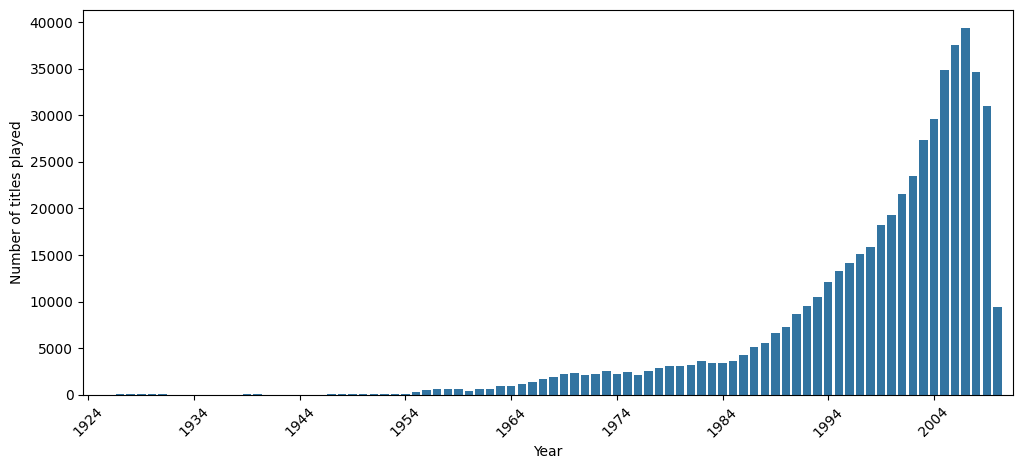

In [165]:
# Set the figure size
plt.figure(figsize=(12,5))

# Create a barplot plot with y label as "number of titles played" and x -axis year
sns.barplot(x=released_counts.index, y=released_counts.values)

# Set the y label of the plot
plt.ylabel('Number of titles played')

# Set the x label of the plot
plt.xlabel('Year')

# Display fewer labels for readability
ax = plt.gca()
ax.set_xticks(ax.get_xticks()[::10])  # Show every 10th label
plt.xticks(rotation=45)  # Rotate for better readability

# Show the plot
plt.show()

#### **Observations and Insights:** #

The resulting barplot shows a left-skewed, approximately bell-shaped distribution. (We can in fact interpret this curve as a histogram of the random variable 'year').

If we leave aside the right-most part of the plot, we see that the number of titles played increases approximately with the released year. This means that most recent songs are more present on the platform. The two decades 1970-1980 and 1980-1990 tend to resist a bit to this tendency, as the slope there is essentially flat (even though the total count is still much lower than later decades).

Interestingly enough, if we look now at the right-most part of the bell, we see that the playcount of the songs released in the last 5 years (~2005-2010 in this dataframe) is drastically decreasing with respect to release year (as opposed to the overall tendancy described above). This might be due to some kind of 'inertia'. Namely, the song production has not decreased in reality, however it takes time (approximately 5 years) for the platform to include them all in the app.

**Think About It:** What other insights can be drawn using exploratory data analysis?

Now that we have explored the data, let's apply different algorithms to build recommendation systems.

**Note:** Use the shorter version of the data, i.e., the data after the cutoffs as used in Milestone 1.

## Building various models

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [166]:
# Calculating average play_count using groupby function on the song_id column
## and the agg() method (allows to keep other columns)

songs_grouped=df_final.groupby(['song_id','title']).agg(average_play_count=('play_count','mean')).sort_values(by='average_play_count', ascending=False)

# Calculating the frequency a song is played using groupby and agg()

songs_grouped_freq=df_final.groupby(['song_id','title']).agg(total_count=('play_count','sum')).sort_values(by='total_count', ascending=False)

# Add frequency column.
## The frequency is understood here as f=(total count of given song)/(total count of all songs)
songs_grouped_freq[['frequency']]=(songs_grouped_freq[['total_count']]/songs_grouped_freq['total_count'].sum())

print('Total number of songs :' + str(df_final.shape[0]) + '\n')
print('Total number of plays (counting repetitions): ' + str(songs_grouped_freq['total_count'].sum()) + '\n')
print('\n'+'-'*45 + '\n')
print('Songs grouped with average playcount: \n\n',songs_grouped)
print('\n'+'-'*45 + '\n')
print('Songs grouped with frequency: \n\n',songs_grouped_freq)

Total number of songs :117876

Total number of plays (counting repetitions): 200396


---------------------------------------------

Songs grouped with average playcount: 

                                average_play_count
song_id title                                    
7224    Victoria (LP Version)            3.373832
8324    The Big Gundown                  2.625000
6450    Brave The Elements               2.578431
9942    Greece 2000                      2.486667
5531    Secrets                          2.309061
...                                           ...
2701    Tron                             1.305970
3534    Who Let You Go?                  1.302469
447     Daisy And Prudence               1.295775
6042    The Runner                       1.288000
2304    Daddy's Eyes                     1.238710

[563 rows x 1 columns]

---------------------------------------------

Songs grouped with frequency: 

                                           total_count  frequency
song_i

In [167]:
 # Making a dataframe with the average_count and play_freq

final_play = songs_grouped.merge(songs_grouped_freq, on=['song_id','title'])

# COMPLEMENT: We add the number of interactions for convenience
## (This will allow us later to correct the rating with 2 different methods)
final_play=final_play.merge(song_interactions.rename('nb_interactions'), on='song_id')

# re-ordering columns for readability
final_play= final_play[['average_play_count','frequency','nb_interactions','total_count']]

# Let us see the first five records of the final_play dataset
final_play.head()

,average_play_count,frequency,nb_interactions,total_count
song_id,,,,
7224,3.373832,0.001801,107,361
8324,2.625000,0.001258,96,252
6450,2.578431,0.001312,102,263
9942,2.486667,0.001861,150,373
5531,2.309061,0.007121,618,1427


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [168]:
# Build the function to find top n songs
def get_top(df,n=10, min_count=200):
  """
   - returns the top n songs based on average playcount in a dataframe
   - displays number of interactions, as well as total play count of any song in this list
  """

  # define groupby object G
  G=df.groupby(['song_id'])

  # aggregate G with:
  ## 1) 'count' to compute number of interactions
  ## 2) 'sum' to compute total play count
  df1=G.agg(nb_interactions=('play_count','sum'),total_count=('play_count','count'))

  # filter those entries where play_count is larger than threshold
  df1=df1[df1.total_count>=min_count]

  # aggregate G with mean of playcounts
  df2=G.agg(average_play_count=('play_count','mean'))

  # merge the two dataframes
  df_merged=df1.merge(df2, on='song_id').sort_values(by='average_play_count', ascending=False)

  # return first n values
  return df_merged.head(n)

In [169]:
# Recommend top 10 songs using the function defined above

# get top 10 songs using previously defined function
top10=get_top(df_final)

# add song information for convenience and readability
top10_with_info=top10.merge(df_final[['song_id','title','artist_name', 'release','year']], on='song_id', how='left').drop_duplicates().set_index('song_id')
top10_with_info

,nb_interactions,total_count,average_play_count,title,artist_name,release,year
song_id,,,,,,,
5531,1427,618,2.309061,Secrets,OneRepublic,Waking Up,2009
2220,1583,713,2.220196,Sehr kosmisch,Harmonia,Musik von Harmonia,<NA>
614,827,373,2.217158,You're The One,Dwight Yoakam,If There Was A Way,1990
352,1634,748,2.184492,Dog Days Are Over (Radio Edit),Florence + The Machine,Now That's What I Call Music! 75,<NA>
1664,845,388,2.177835,Horn Concerto No. 4 in E flat K495: II. Romanc...,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Mozart - Eine kleine Nachtmusik,<NA>
6246,910,422,2.156398,Canada,Five Iron Frenzy,The End Is Here,<NA>
4448,1291,609,2.119869,Fireflies,Charttraxx Karaoke,Karaoke Monthly Vol. 2 (January 2010),2009
1334,1208,570,2.119298,Hey_ Soul Sister,Train,Save Me_ San Francisco,<NA>
8019,528,250,2.112000,Gears,Future Rock,Gears,<NA>


### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [170]:
# Install the surprise package using pip. Uncomment and run the below code to do the same

!pip install surprise

In [171]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise import Reader

# Class for loading datasets
from surprise import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE, and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

In [172]:
def precision_recall_at_k(model, k=30, threshold=1.5, confusion=False):
    """
    Returns precision and recall at k metrics for each user
    Args:
        model: the algorithm considered
        k: size of the recommendation list used to evaluate metrics
        threshold: rating threshold to determine whether item is relevant
    Returns:
    None: Prints details of the metrics obtained
    cm: confusion matrix (if confusion=True)
    """

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    #Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()

    if confusion:
      TPs=dict()
      TNs=dict()
      FPs=dict()
      FNs=dict()
    else:
      pass

    for uid, playing_count in user_est_true.items():

        # Sort play count by estimated value
        playing_count.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in playing_count)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in playing_count[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in playing_count[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

        if confusion:
      # Compute confusion matrix
          TPs[uid] = n_rel_and_rec_k # True Positive
          TNs[uid] = len(playing_count)- n_rel - n_rec_k + n_rel_and_rec_k # True Negative
          FPs[uid] = n_rec_k-n_rel_and_rec_k # False Positive
          FNs[uid] = n_rel-n_rel_and_rec_k # False Negative


    #Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)),3)
    #Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)),3)

    accuracy.rmse(predictions)
    print('Precision: ', precision) #Command to print the overall precision
    print('Recall: ', recall) #Command to print the overall recall
    print('F_1 score: ', round((2*precision*recall)/(precision+recall),3)) # Formula to compute the F-1 score.

    if confusion:
      TP=sum(TPs.values())
      TN=sum(TNs.values())
      FP=sum(FPs.values())
      FN=sum(FNs.values())
      cm = np.array([[TP, FN], [FP, TN]])
      cm_df = pd.DataFrame(cm, columns=['Predicted Relevant', 'Predicted Irrelevant'], index=['Actually Relevant', 'Actually Irrelevant'])
      return cm_df
    else:
      pass

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5?

Below we are loading the **dataset**, which is a **pandas dataframe**, into a **different format called `surprise.dataset.DatasetAutoFolds`** which is required by this library. To do this we will be **using the classes `Reader` and `Dataset`**

You will also notice here that we read the dataset by providing a scale of ratings. However, as you would know, we do not have ratings data of the songs. In this case, we are going to use play_count as a proxy for ratings with the assumption that the more the user listens to a song, the higher the chance that they like the song

In [173]:
# Instantiating Reader scale with expected rating scale
 #use rating scale (0, 5)
reader = Reader(rating_scale=(0,5))

# Loading the dataset
 # Take only "user_id","song_id", and "play_count"
data=Dataset.load_from_df(df_final[['user_id','song_id','play_count']], reader)

# Splitting the data into train and test dataset
 # Take test_size = 0.4, random_state = 42
trainset, testset = train_test_split(data, test_size=0.4, random_state=42)

**Think About It:** How changing the test size would change the results and outputs?

In [174]:
# Build the default user-user-similarity model#
# KNN algorithm is used to find desired similar items
 # Use random_state = 1

sim_user_user = KNNBasic(sim_options = {'name': 'cosine', 'user_based': True},random_state=1)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
 # Use sim_user_user model
precision_recall_at_k(sim_user_user)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0878
Precision:  0.396
Recall:  0.692
F_1 score:  0.504


**Observations and Insights**

The KNN Basic algorithm shows a root mean squared errorof 1.08. The F1 score, which is the harmonic mean of a 'low' precision (39%) and a relatively much better recall (~69%).

In summary, the algorithm does well in catching the items that were actually relevant to users (intuition for recall). But it performs quite poorly when it comes to minimizing the amount of irrelevant items recommended.

Put differently, the algorithm seems to recommend too many different items to any given user, and this creates a lot of False Positives. It is perhaps an indication that the threshold value 1.5 to recommend items is not the best one (it should be increased slightly?).




In [175]:
# COMPLEMENT:
# DEFINE A FUNCTION THAT GIVES THE TRUE RATING

def true_rating(df,uid,iid):
  """
  - returns the true rating of a user-item pair if it has interacted in the past
  - otherwise returns None
  """

  # filter data to catch interaction
  data=df[(df['user_id']==uid) & (df['song_id']==iid)]

  # if no interaction return None
  if data['play_count'].tolist()==[]:
    print("This pair has not interacted yet")
    return None

  # if interaction return play_count
  else:
    actual_value=data.play_count.tolist()[0]
    print("This pair has interacted before and the true play count is {0}".format(actual_value))
    return actual_value

In [176]:
# Predicting play_count for a sample user with a listened song
# Use any user id  and song_id
uid=6958
iid=1671

# call function 'true_rating' to get existing interaction data
r_ui=true_rating(df_final,uid,iid)
sim_user_user.predict(uid, iid, r_ui)

This pair has interacted before and the true play count is 2


Prediction(uid=6958, iid=1671, r_ui=2, est=1.8009387435128914, details={'actual_k': 40, 'was_impossible': False})

In [177]:
# Predicting play_count for a sample user with a song not-listened by the user
 #predict play_count for any sample user

uid=6958
iid=3232

r_ui=true_rating(df_final,uid,iid) # is None
sim_user_user.predict(uid, iid, r_ui)

This pair has not interacted yet


Prediction(uid=6958, iid=3232, r_ui=None, est=1.6386860897998294, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:**

- The first predicted value (1.80) is close to the true value (2), which is to be expected.

- the non-interacted item is given a value of 1.63.

Now, let's try to tune the model and see if we can improve the model performance.

In [178]:
# Setting up parameter grid to tune the hyperparameters
param_grid={'k': [10, 20, 30],
            'sim_options': {'name': ['cosine', 'msd'],
                            'user_based': [True]}
            }

# Performing 3-fold cross-validation to tune the hyperparameters
gs=GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3)

# Fitting the data
 # Use entire data for GridSearch
gs.fit(data)

# Best RMSE score
print('The best RMSE score is ', gs.best_score)

# Combination of parameters that gave the best RMSE score
best=gs.best_params['rmse']
print('The best parameters for RMSE are ', best)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarit

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0672
Precision:  0.412
Recall:  0.598
F_1 score:  0.488


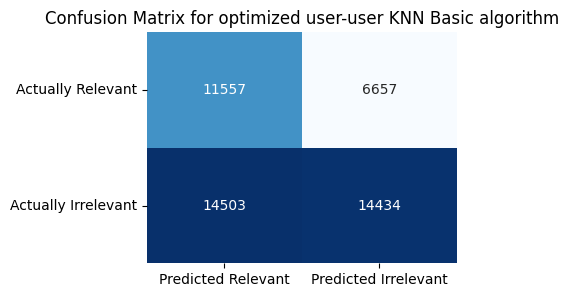

In [179]:
# Train the best model found in above gridsearch
## Note: we use the syntax '**dict' to unpack the values of a dictionary
### (In this way we can directly put all the optimized parameters obtained above)

sim_user_user_optimized = KNNBasic(**best)
sim_user_user_optimized.fit(trainset)

# Test precision and recall at k
cm = precision_recall_at_k(sim_user_user_optimized,confusion=True)

# Plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for optimized user-user KNN Basic algorithm')
plt.show()

**Observations and Insights:** After tuning of hyperparameters, we see that RMSE has indeed skrinked a bit (from ~1.08 down to ~1.06), which is to be expected as we included the default parameters in our grid.

However, the result is a bit disappointing concerning other metrics. Recall and F1 score have decreased (from ~0.69 to ~0.59, and from ~0.51 to ~0.48), which is not a desired behaviour. Only precision went (slightly) up, from ~0.39 to ~0.41.

In [180]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
uid=6958
iid=1671

# call function 'true_rating' to get existing interaction data (even though it was already provided)
r_ui=true_rating(df_final,uid,iid) # equal to 2
sim_user_user_optimized.predict(uid, iid, r_ui)

This pair has interacted before and the true play count is 2


Prediction(uid=6958, iid=1671, r_ui=2, est=1.6254190211665536, details={'actual_k': 30, 'was_impossible': False})

In [181]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
uid=6958
iid=3232

r_ui=true_rating(df_final,uid,iid) # equal to None
sim_user_user_optimized.predict(uid, iid, r_ui)

This pair has not interacted yet


Prediction(uid=6958, iid=3232, r_ui=None, est=1.3609600600037504, details={'actual_k': 30, 'was_impossible': False})

**Observations and Insights:**

- For the first interaction pair, the value predicted is 1.62, which is close enough to the integer 2 (true value), but less accurate than the baseline.

- For the second (non-interacted pair), we have a prediction of ~1.36, lower than the baseline.

**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

In [182]:
# Use inner id 0
## ISSUE WITH THE QUESTION: this inner id is a user id (i.e. not an item id).
### THEREFORE THE FUNCTION BELOW PROVIDES 5 NEAREST USERS (AND NOT SONGS)
nearest_neighbors=sim_user_user_optimized.get_neighbors(0, 5) # get inner ids
ids=[sim_user_user_optimized.trainset.to_raw_uid(inner_id) for inner_id in nearest_neighbors] # get raw ids

print('The five nearest neighbors for inner id 0 are ', ids) # PROBLEM: THOSE ARE USERS, NOT SONGS

The five nearest neighbors for inner id 0 are  [8112, 37944, 56747, 64307, 3643]


Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [183]:
def get_recommendations(data, user_id, n, algo):
    """
    Yields the top n items recommended for the given user_id by a given algorithm
    Args:
    - data: the dataset
    - user_id: the user_id for which we want the recommendations
    - n: the number of recommendations to return
    - algo: the algorithm we want to use for predicting the play_count
    Returns:
    - a set of top n items, along with the corresponding play_count
    """

    # Creating an empty list to store the recommended song ids
    L=[]

    # Creating an user item interactions matrix
    M = data.pivot(index='user_id', columns='song_id', values='play_count')

    # Extracting those song ids which the user_id has not played yet
    S=M.loc[user_id][M.loc[user_id].isnull()].index.tolist()

    # Looping through each of the song ids which user_id has not interacted yet
    for iid in S:

        # Predicting the users for those non played song ids by this user
        ## For ease of readability we only take the 2 first decimals
        est=np.round(algo.predict(user_id, iid).est, decimals=2)

        # Appending the predicted play_counts
        L.append((iid, est))

    # Sorting the predicted play_counts in descending order
    L.sort(key=lambda x: x[1], reverse=True)

    return L[:n] # Returning top n highest predicted play_count songs for this user

In [184]:
# Make top 5 recommendations for any user_id with a similarity-based recommendation engine
## We choose our user randomly using random.choice as follows:

users = user_interactions.index.tolist() # user interaction was defined previously
random_uid=random.choice(users)
n=5

# Call function 'get_recommendations' with this data
L=get_recommendations(df_final, random_uid, n, sim_user_user_optimized)

print('The top ' + str(n) + ' recommendations for user with user_id ' + str(random_uid) + ' are: \n' + str(L))

The top 5 recommendations for user with user_id 55659 are: 
[(7224, 3.28), (9942, 2.76), (8483, 2.59), (8029, 2.49), (8324, 2.48)]


In [185]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"

df_recommendations=pd.DataFrame(L, columns=['song_id', 'predicted_play_count'])

# add descriptive information to song_id for convenience

df_recommendations.merge(df_final[['song_id','title','release','year']], on='song_id', how='left').drop_duplicates().set_index('song_id')

,predicted_play_count,title,release,year
song_id,,,,
7224,3.28,Victoria (LP Version),Hit By A Train: The Best Of Old 97's,2006
9942,2.76,Greece 2000,Greece 2000,1997
8483,2.59,Video Killed The Radio Star,Friends Reunited: Music Of The Year 1979,1979
8029,2.49,I CAN'T GET STARTED,It's The Time,<NA>
8324,2.48,The Big Gundown,Invaders Must Die Remixes and Bonus Tracks,2009


**Observations and Insights:**

Those are the five songs recommended by our optimized KNN Basic algorithm. We added the information about the songs for convenience.

### Correcting the play_counts and Ranking the above songs

In [186]:
def ranking_songs(recommendations, playing_count, correction=None):
  """
  - returns the top songs based on average playcount in a dataframe
  - displays number of interactions, as well as total play count of any song in this list

  Args:
  1) recommendations is a dataframe with the following columns
  - song_id
  - predicted_play_count

  2) final_play is a dataframe with the following columns:
  - average_play_count
  - frequency
  - nb_interactions
  - total_count

  3) correction takes the two values 'total_count' and 'nb_interactions'
  It gives two different ways to correct the predicted play_count
  If set to None, there is no correction.

  Returns:
  - a dataframe with the following columns:
  - song_id
  - average_play_count
  - predicted_play_count
  - corrected_play_count (if correction applied)
  """

  # Sort the songs based on play counts
  playing_count.sort_values(by='total_count', ascending=False,inplace=True)

  # Merge with the recommended songs to get predicted play_counts
  recommendations=recommendations.merge(playing_count, on='song_id')

  # Calculate the correction factor
  if correction=='nb_interactions':
    penalty = 1/np.sqrt(recommendations['nb_interactions'])
  elif correction=='total_count':
    penalty = 1/np.sqrt(recommendations['total_count'])
  else:
    penalty=0

  # Correct the predicted play_counts and put in new column
  recommendations['corrected_play_count']=np.round(recommendations['predicted_play_count'] - penalty ,3)

  # Rank the songs based on corrected play_counts
  recommendations.sort_values(by='corrected_play_count', ascending=False, inplace=True)

  # returns dataframe of recommendations
  # 1) case when a correction is applied
  if correction!=None:
    print('The songs have been corrected by subtracting the inverse square-root of ' + str(correction) + ': \n')
    return recommendations[['song_id','average_play_count', 'predicted_play_count', 'corrected_play_count']].set_index('song_id')

  # 2) case when no correction is applied
  else:
    print('No correction has been applied: \n')
  return recommendations[['song_id','average_play_count', 'predicted_play_count']].set_index('song_id')

**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

In [187]:
# Applying the ranking_songs function on the final_play data

for correction in [None, 'nb_interactions', 'total_count']:

  print(np.round(ranking_songs(df_recommendations, final_play,correction=correction),3))

  print('\n'+ '-'*50 + '\n')

No correction has been applied: 

         average_play_count  predicted_play_count
song_id                                          
7224                  3.374                  3.28
9942                  2.487                  2.76
8483                  2.236                  2.59
8029                  1.955                  2.49
8324                  2.625                  2.48

--------------------------------------------------

The songs have been corrected by subtracting the inverse square-root of nb_interactions: 

         average_play_count  predicted_play_count  corrected_play_count
song_id                                                                
7224                  3.374                  3.28                 3.183
9942                  2.487                  2.76                 2.678
8483                  2.236                  2.59                 2.500
8029                  1.955                  2.49                 2.431
8324                  2.625             

**Observations and Insights:**

- The two different types of corrections (based on n='nb_interaction' or n='total_count') yield the same recommendation list.

- applying a correction indeed (slightly) modifies the ranking, as songs 2914 and 5531 (ranked respectively 2nd and 3rd on the uncorrected list) switched their ranking.

In principle, one should trust the corrected ranking in priority, even though there is no strong evidence that this yields better predictions at the moment.



### Item Item Similarity-based collaborative filtering recommendation systems

In [188]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance
sim_item_item = KNNBasic(sim_options = {'name': 'cosine', 'user_based': False},random_state=1)

# Train the algorithm
sim_item_item.fit(trainset)

# Test precision and recall at k
precision_recall_at_k(sim_item_item)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0394
Precision:  0.307
Recall:  0.562
F_1 score:  0.397


**Observations and Insights:**

We observe a similar pattern as for the item-item based KNN algorithm, namely:
- precision and F1 score are quite low (~0.30 and ~0.39 respectively).
- Recall is a bit better (~0.56) but still indicates a lot of False Negatives (relative to the number True Positive).
- The root mean squared error is close to one (~1.03, compared to 1.06 obtained previously for the user based KNN)


In [189]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) listened to by the user
uid=6958
iid=1671

# call function 'true_rating' to get interaction datad
r_ui=true_rating(df_final,uid,iid)
sim_item_item.predict(uid, iid, r_ui)

This pair has interacted before and the true play count is 2


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3614157231762556, details={'actual_k': 20, 'was_impossible': False})

In [190]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
uid=6958
iid=3232

r_ui=true_rating(df_final,uid,iid) # equal to None
sim_item_item.predict(uid, iid, r_ui)

This pair has not interacted yet


Prediction(uid=6958, iid=3232, r_ui=None, est=1.377602711737415, details={'actual_k': 20, 'was_impossible': False})

**Observations and Insights:**

- the first interaction pair yields a predicted value is of ~1.36, which is below the threshold and rather far from the real value (2).

- The second (non-interacted) pair has a predicted value of ~1.37


In [191]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid={'k': [10, 20, 30],
            'sim_options': {'name': ['cosine', 'msd'],
                            'user_based': [False]}
            }
# Performing 3-fold cross-validation to tune the hyperparameters
gs_item=GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3)

# Fitting the data
gs_item.fit(data)

# Find the best RMSE score
print('The best RMSE score is ', gs_item.best_score['rmse'])

# Extract the combination of parameters that gave the best RMSE score
best_item=gs_item.best_params['rmse']
print('The best combination of parameters for RMSE are ', best_item)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarit

**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0401
Precision:  0.312
Recall:  0.56
F_1 score:  0.401


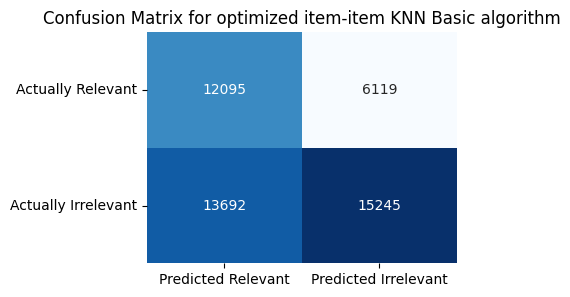

In [192]:
# Apply the best model found in the grid search
sim_item_item_optimized = KNNBasic(**best_item,random_state=1)

# Train the algorithm
sim_item_item_optimized.fit(trainset)

# Compute precision and recall at k
cm = precision_recall_at_k(sim_item_item_optimized, confusion=True)

# Plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for optimized item-item KNN Basic algorithm')
plt.show()

**Observations and Insights:**

The algorithm seems to perform slightly better, even though there may be still room for improvement:
- The RMSE is essentially the same (~1.04) as for the baseline model.
- Similarly, recall is the same as for the baseline (0.56).
- However, precision and F1 score have improved a bit (from 0.30 to 0.31 and 0.39 to 0.40 respectively).


In [193]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
uid=6958
iid=1671

# call function 'true_rating' to get existing interaction data
r_ui=true_rating(df_final,uid,iid)
sim_item_item_optimized.predict(uid, iid, r_ui)

This pair has interacted before and the true play count is 2


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3614157231762556, details={'actual_k': 20, 'was_impossible': False})

In [194]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not listened to by the user
uid=6958
iid=3232

r_ui=true_rating(df_final,uid,iid) # equal to None
sim_item_item_optimized.predict(uid, iid, r_ui)

This pair has not interacted yet


Prediction(uid=6958, iid=3232, r_ui=None, est=1.377602711737415, details={'actual_k': 20, 'was_impossible': False})

**Observations and Insights:**

- For the first interaction pair, the value 1.36 is being predicted by the optimized algorithm, which is the same as for the baseline (i.e. non-optimized) model.

- We observe something similar for the second interaction pair. The predicted rating is ~1.37, which coincides which the prediction of the baseline model.

In [195]:
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


In [196]:
# Find five most similar items to the item with inner id 0
most_similar=sim_item_item_optimized.get_neighbors(0, 5)
most_similar

# give true identities
for i in most_similar:
  print(sim_item_item_optimized.trainset.to_raw_iid(i)) # print song_id

9702
8624
5616
6482
2686


In [197]:
# Making top 5 recommendations for any user_id  with item_item_similarity-based recommendation engine

# Set number of recommendations desired
n=5

# Set user (same as before)
uid=6958

# Call function 'get_recommendations' with this data
top = get_recommendations(df_final, uid, n, sim_item_item_optimized)

# print result
print('The top ' + str(n) + ' recommendations for user with user_id ' + str(uid) + ' are: \n' + str(top))

The top 5 recommendations for user with user_id 6958 are: 
[(2842, 1.65), (1767, 1.54), (4631, 1.54), (5417, 1.54), (7921, 1.54)]


In [198]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
D=pd.DataFrame(top, columns=['song_id', 'predicted_play_count'])

# add song info
print('Those are the ' + str(n) + ' songs recommended by our optimized KNN Basic algorithm for user ' + str(uid) + ':\n')
D.merge(df_final[['song_id','title','artist_name','release','year']], on='song_id', how='left').drop_duplicates().set_index('song_id')

Those are the 5 songs recommended by our optimized KNN Basic algorithm for user 6958:



,predicted_play_count,title,artist_name,release,year
song_id,,,,,
2842,1.65,Superman,Eminem / Dina Rae,The Eminem Show,2003
1767,1.54,Rehab,Rihanna,Hip Hop The Collection 2009,2007
4631,1.54,Ms. Jackson,OutKast,Big Boi & Dre Present_ Outkast,2000
5417,1.54,Thrills,LCD Soundsystem,LCD Soundsystem,2005
7921,1.54,Never Let You Go,Justin Bieber,My Worlds,2010


In [199]:
# Applying the ranking_songs function
R=pd.DataFrame(top, columns=['song_id', 'predicted_play_count'])

for correction in [None, 'nb_interactions', 'total_count']:
  print(pd.DataFrame(ranking_songs(R, final_play,correction=correction)))
  print('\n'+ '-'*50 + '\n')

No correction has been applied: 

         average_play_count  predicted_play_count
song_id                                          
2842               1.706897                  1.65
1767               1.437500                  1.54
4631               1.591667                  1.54
5417               1.540741                  1.54
7921               1.531818                  1.54

--------------------------------------------------

The songs have been corrected by subtracting the inverse square-root of nb_interactions: 

         average_play_count  predicted_play_count  corrected_play_count
song_id                                                                
2842               1.706897                  1.65                 1.584
7921               1.531818                  1.54                 1.473
5417               1.540741                  1.54                 1.454
4631               1.591667                  1.54                 1.449
1767               1.437500             

**Observations and Insights:**

Again, the type of correction considered (either based on 'nb_interactions' or 'total_count') does not affect the ranking. Applying any such correction, however, does change the ranking significantly (for instance song 7921 becomes second in the list, compared to 5th position if no correction is applied).

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [200]:
# Build baseline model using svd
svd = SVD(random_state=1)

# Fit the model
svd.fit(trainset)

# Evaluate the model performance
precision_recall_at_k(svd)

RMSE: 1.0252
Precision:  0.41
Recall:  0.633
F_1 score:  0.498


In [201]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
uid=6958
iid=1671

# call function 'true_rating' to get existing interaction data
r_ui=true_rating(df_final,uid,iid)
svd.predict(uid, iid, r_ui)

This pair has interacted before and the true play count is 2


Prediction(uid=6958, iid=1671, r_ui=2, est=1.267473397214638, details={'was_impossible': False})

In [202]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
uid=6958
iid=3232

r_ui=true_rating(df_final,uid,iid) # equal to None
svd.predict(uid, iid, r_ui)

This pair has not interacted yet


Prediction(uid=6958, iid=3232, r_ui=None, est=1.5561675084403663, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [203]:
# Set the parameter space to tune
grid_params = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}

# Perform 3-fold grid-search cross-validation
gs_svd=GridSearchCV(SVD, grid_params, measures=['rmse'], cv=3)

# Fitting data
gs_svd.fit(data);

# Best RMSE score
print('The best RMSE score is: \n',
      gs_svd.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
best_svd=gs_svd.best_params['rmse']
print('It is obtained for the following combination of parameters :\n',best_svd)

The best RMSE score is: 
 1.022836938125564
It is obtained for the following combination of parameters :
 {'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

RMSE: 1.0242
Precision:  0.414
Recall:  0.734
F_1 score:  0.529


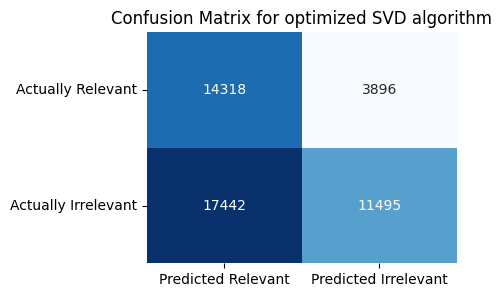

In [204]:
# Building the optimized SVD model using optimal hyperparameters
svd_optimized = SVD(**best_svd, random_state=1)

# Fit the model
svd_optimized.fit(trainset)

# Evaluate the model performance and compute confusion matrix
cm = precision_recall_at_k(svd_optimized,confusion=True)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for optimized SVD algorithm')
plt.show()

**Observations and Insights:**

Parameter tuning has indeed increased the performance compared to the baseline algorithm. In more detail:
- Root mean squared error is roughly the same (went a bit down from ~1.025 to ~1.024).
- Precision is roughly the same (increased from 0.410 to 0.414).
- Recall and F1 score have significantly increased (from ~0.63 to ~0.73 and ~0.49 to 0.52 respectively).



In [205]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
uid=6958
iid=1671

# call function 'true_rating' to get existing interaction data
r_ui=true_rating(df_final,uid,iid)
svd_optimized.predict(uid, iid, r_ui)

This pair has interacted before and the true play count is 2


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3954853087870478, details={'was_impossible': False})

In [206]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count
uid=6958
iid=3232

r_ui=true_rating(df_final,uid,iid) # equal to None
svd_optimized.predict(uid, iid, r_ui)

This pair has not interacted yet


Prediction(uid=6958, iid=3232, r_ui=None, est=1.5370581372265097, details={'was_impossible': False})

**Observations and Insights:**

- For the interaction pair (6958,1671), the prediction is slightly better (i.e. closer to 2) than for previous algorithms. Namely, we obtain a predicted playcount of 1.39 (to be compared with 1.26 for the baseline SVD model and -- for instance -- with 1.36 for the item-item KNN optimized).

- For the second (non-interacted pair), we observe a predicted playcount of ~1.53.

In [207]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
top_svd=get_recommendations(df_final, uid, n, svd_optimized)

print('The top ' + str(n) + ' recommendations for user with user_id ' + str(uid) + ' are: \n' + str(top_svd))

The top 5 recommendations for user with user_id 6958 are: 
[(7224, 2.68), (5653, 2.12), (8324, 2.11), (6450, 2.07), (9942, 2.03)]


In [208]:
# Ranking songs based on above recommendations
for correction in [None, 'nb_interactions', 'total_count']:
  print(pd.DataFrame(ranking_songs(pd.DataFrame(top_svd, columns=['song_id', 'predicted_play_count']), final_play,correction=correction)))
  print('\n'+ '-'*50 + '\n')

No correction has been applied: 

         average_play_count  predicted_play_count
song_id                                          
7224               3.373832                  2.68
5653               2.296296                  2.12
8324               2.625000                  2.11
6450               2.578431                  2.07
9942               2.486667                  2.03

--------------------------------------------------

The songs have been corrected by subtracting the inverse square-root of nb_interactions: 

         average_play_count  predicted_play_count  corrected_play_count
song_id                                                                
7224               3.373832                  2.68                 2.583
5653               2.296296                  2.12                 2.024
8324               2.625000                  2.11                 2.008
6450               2.578431                  2.07                 1.971
9942               2.486667             

**Observations and Insights:**

This is a list of 5 mostly recommended items for user 6958.
Contrary to KNN algorithms, we see that the ranking is 'robust', in the sense that it is independent of the correction applied (correcting the predicted value does not change the order of suggested items).

It would be worth testing whether this particular observation generalizes to other users.



### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [209]:
# Make baseline clustering model
cluster = CoClustering(random_state=1)

# Fit the model
cluster.fit(trainset)

# Evaluate the model performance
precision_recall_at_k(cluster)

RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


In [210]:
# Making prediction for user_id 6958 and song_id 1671
uid=6958
iid=1671

# call function 'true_rating' to get existing interaction data
r_ui=true_rating(df_final,uid,iid) # equal to 2
cluster.predict(uid, iid, r_ui)

This pair has interacted before and the true play count is 2


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2941824757363074, details={'was_impossible': False})

In [211]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not listened to by the user
uid=6958
iid=3232

# call function 'true_rating' to get existing interaction data
r_ui=true_rating(df_final,uid,iid) # equal to None
cluster.predict(uid, iid, r_ui)

This pair has not interacted yet


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4785259100797417, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [212]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [2, 3], 'n_cltr_i': [2, 3],
              'n_epochs': [5, 10], 'random_state': [1]}

# Performing 3-fold grid search cross-validation
gs_cluster=GridSearchCV(CoClustering, param_grid, measures=['rmse'], cv=3)

# Fitting data
gs_cluster.fit(data)

# Best RMSE score
print('The best RMSE score is: \n',
      gs_cluster.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
best_cluster=gs_cluster.best_params['rmse']
print('It is obtained for the following combination of parameters :\n',best_cluster)


The best RMSE score is: 
 1.0383645950666123
It is obtained for the following combination of parameters :
 {'n_cltr_u': 2, 'n_cltr_i': 3, 'n_epochs': 10, 'random_state': 1}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

RMSE: 1.0429
Precision:  0.388
Recall:  0.576
F_1 score:  0.464


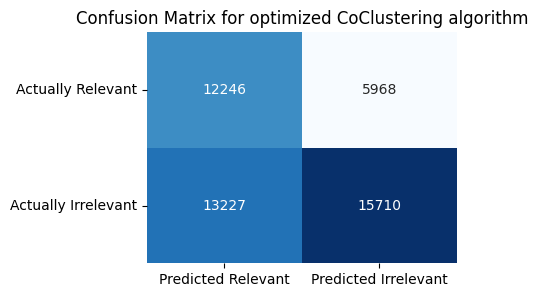

In [213]:
# Train the tuned Coclustering algorithm
cluster_optimized=CoClustering(**best_cluster)

# Fit the model
cluster_optimized.fit(trainset)

# Evaluate the model performance
cm=precision_recall_at_k(cluster_optimized,confusion=True)

# plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for optimized CoClustering algorithm')
plt.show()

**Observations and Insights:**

Here the parameter tuning (barely) improves the error measurements.
- RMSE went down from ~1.048 to ~1.042
- Recall improved from 0.582 to 0.589

But:
- Precision and F1 score are slightly worse (respectively: 0.393 against 0.397 for the baseline and 0.471 against 0.472 for the baseline).


In [214]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
uid=6958
iid=1671

r_ui=true_rating(df_final,uid,iid) # equal to 2
cluster_optimized.predict(uid, iid, r_ui)

This pair has interacted before and the true play count is 2


Prediction(uid=6958, iid=1671, r_ui=2, est=1.12287271245878, details={'was_impossible': False})

In [215]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count
uid=6958
iid=3232

r_ui=true_rating(df_final,uid,iid) # equal to None
cluster_optimized.predict(uid, iid, r_ui)

This pair has not interacted yet


Prediction(uid=6958, iid=3232, r_ui=None, est=1.0605124783774038, details={'was_impossible': False})

**Observations and Insights:**

- For the first interaction pair (6958, 1671), the predicted playcount is ~0.91, which is quite far from the true value (2), and yields the worse prediction obtained so far. This might be partly due to noise since the model does not perform significantly worse on the usual metrics.

- We obtain a prediction of 1.10 for the second (non-interacted) pair.

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [216]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
uid=6958
n=5

# Call function 'get_recommendations' with this data
top_cluster=get_recommendations(df_final, uid, n, cluster_optimized)

# print result
print('The top ' + str(n) + ' recommendations for user with user_id ' + str(uid) + ' are: ' + str(top_cluster))

The top 5 recommendations for user with user_id 6958 are: [(7224, 3.29), (6450, 2.53), (8324, 2.5), (9942, 2.41), (4831, 2.32)]


### Correcting the play_count and Ranking the above songs

In [217]:
# Ranking songs based on the above recommendations
for correction in [None, 'nb_interactions', 'total_count']:
  print(pd.DataFrame(ranking_songs(pd.DataFrame(top_cluster, columns=['song_id', 'predicted_play_count']), final_play,correction=correction)))
  print('\n'+ '-'*50 + '\n')

No correction has been applied: 

         average_play_count  predicted_play_count
song_id                                          
7224               3.373832                  3.29
6450               2.578431                  2.53
8324               2.625000                  2.50
9942               2.486667                  2.41
4831               2.206186                  2.32

--------------------------------------------------

The songs have been corrected by subtracting the inverse square-root of nb_interactions: 

         average_play_count  predicted_play_count  corrected_play_count
song_id                                                                
7224               3.373832                  3.29                 3.193
6450               2.578431                  2.53                 2.431
8324               2.625000                  2.50                 2.398
9942               2.486667                  2.41                 2.328
4831               2.206186             

**Observations and Insights:**

This is the list of 5 most recommended songs for the user 6958, obtained this time via cluster algorithm.

It is the same (unordered) set of 5 songs as the one provided by SVD, even though the order of items is different.

Moreover, just as for SVD, we see that putting a correction does not change the ranking.

### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [218]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"

df_final['text'] = df_final['title'] + " " + df_final['release'] + " " + df_final['artist_name']
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year,text
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000,Daisy And Prudence Distillation Erin McKeown
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004,The Ballad of Michael Valentine Sawdust The Ki...
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007,I Stand Corrected (Album) Vampire Weekend Vamp...
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007,They Might Follow You Tiny Vipers Tiny Vipers
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007,Monkey Man You Know I'm No Good Amy Winehouse


In [219]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small=df_final[['user_id', 'song_id', 'play_count', 'title', 'text']].copy()
print('The dataframe has', df_small.shape[0], 'rows \n')

# Drop the duplicates from the title column
df_small.drop_duplicates(subset=['title'], inplace=True)
print('After removing duplicates, the dataframe has ', df_small.shape[0], 'rows. \n')

# Set the title column as the index
df_small.set_index('title', inplace=True)

# See the first 5 records of the df_small dataset
df_small.head()

The dataframe has 117876 rows 

After removing duplicates, the dataframe has  561 rows. 



,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And Prudence Distillation Erin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael Valentine Sawdust The Ki...
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album) Vampire Weekend Vamp...
They Might Follow You,6958,703,1,They Might Follow You Tiny Vipers Tiny Vipers
Monkey Man,6958,719,1,Monkey Man You Know I'm No Good Amy Winehouse


In [220]:
# Create the series of indices from the data
indices=pd.Series(df_small.index)
indices[:5]

,title
0,Daisy And Prudence
1,The Ballad of Michael Valentine
2,I Stand Corrected (Album)
3,They Might Follow You
4,Monkey Man


In [221]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library
nltk.download('punkt')

# Download stopwords library
nltk.download('stopwords')

# Download wordnet
nltk.download('wordnet')

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


We will create a **function to pre-process the text data:**

In [222]:
# Create a function to tokenize the text
def tokenize(text):
  """
  Processes strings into a list of tokens.

  Arg:
  - text: string to be processed
  Returns:
  - clean_tokens: a list of cleaned tokens
  """

  # Compute tokens
  Tokens=word_tokenize(text)

  # Remove a set of stop words in English
  stop_words=stopwords.words('english')
  clean_tokens=[word for word in Tokens if word not in stop_words]

  # Lemmatize (i.e. reduce words to root)
  lemma=WordNetLemmatizer()
  clean_tokens=[lemma.lemmatize(word) for word in clean_tokens]

  return clean_tokens

In [223]:
# test
tokenize('Tomorrow, I will return my notebook to an MIT evaluator. I hope he or she likes it!')

['Tomorrow',
 ',',
 'I',
 'return',
 'notebook',
 'MIT',
 'evaluator',
 '.',
 'I',
 'hope',
 'like',
 '!']

In [224]:
# Create tfidf vectorizer
tfidf=TfidfVectorizer(tokenizer=tokenize)

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
tfidf_matrix=tfidf.fit_transform(df_small['text']).toarray()
tfidf_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [225]:
# Compute the cosine similarity for the tfidf above output

similarity = cosine_similarity(tfidf_matrix)

# display some entries
np.round(similarity[0:13,0:13],1)

array([[1. , 0. , 0. , 0. , 0. , 0. , 0. , 0.3, 0. , 0. , 0.4, 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0. ],
       [0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0.1, 0. , 0.1, 0. ],
       [0.3, 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0.2, 0. , 0. ],
       [0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0. , 0. , 1. , 0. , 0.1, 0. ],
       [0.4, 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0. , 0. , 1. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.1, 0. , 0.1, 0. , 0. , 0.1, 0. , 1. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. ]])

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [226]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):
    """
    Yields a recommendation list based on similarities between given title and a similarity matrix

    Args:
    - title (str): the title of a song for which recommendations are to be made
    - similar_songs (np.array): the similarity matrix of all songs
    """

    recommended_songs = []

    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0] # indices dataframe defined in previous cells

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[0:10].index)

    # Populating the list with the titles of the best 10 matching songs
    indices_list = indices[top_10_indexes]

    return indices_list

Recommending 10 songs similar to Learn to Fly

In [227]:
# Make the recommendation for the song with title 'Learn To Fly'
R=recommendations('Learn To Fly', similarity)
R.index = R.index.rename('song_id')

RR=pd.DataFrame(R).merge(df_final[['song_id','title','artist_name','release','year']].drop_duplicates(), on='title', how='left').set_index('song_id')
RR


,title,artist_name,release,year
song_id,,,,
1188,Learn To Fly,Foo Fighters,There Is Nothing Left To Lose,1999
9249,Everlong,Foo Fighters,The Colour And The Shape (Special Edition),1992
6525,The Pretender,Foo Fighters,Echoes_ Silence_ Patience & Grace,2007
1994,Nothing Better (Album),Postal Service,Give Up,2003
4739,From Left To Right,Boom Bip,Corymb,2003
3101,Lifespan Of A Fly,the bird and the bee,Ray Guns Are Not Just The Future,2009
771,Under The Gun,The Killers,Sawdust,2004
1674,I Need A Dollar,Aloe Blacc,I Need A Dollar,2010
1936,Feel The Love,Cut Copy,In Ghost Colours,2008


**Observations and Insights:**
- Unsurprisingly, the algorithm has found similarities between songs of the name artist (in this case, Foo Fighters and The Killers). This is to be expected, as the same artist_name is part of the tokenized text of two different songs of the same artist, thus yielding higher similarity values.

- The dates are relatively homogeneous (ranging from 1992 to 2006), which mirrors a similar mechanism for dates (i.e. closer dates will yield higher similarity scores.

- It is a bit less clear how to interpret the songs with no common artist name, this would require a deeper analysis of what the vectorizer does.

An interesting direction would be to compare this list with the most similar items given by the sim_item_item algorithm.